In [1]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import random
import pickle
import sys

In [2]:
## Load in image folder.
data_directory = 'C:\\Users\\User\\Desktop\\leukemia capstone'
categories = ['BAS','EBO','EOS','KSC','LYA','LYT','MMZ','MOB','MON',
              'MYB','NGS','MYO','NGB','PMB','PMO']
categories_2 = ['EBO','BAS','MYB','MOB','KSC','LYA','MMZ','PMB','PMO','NGB']

In [3]:
## Turn images into numerical arrays for the CNN model.
classification = []
data = []
def create_dataset(dataset):
    for label in dataset:
        path = os.path.join(data_directory,label)
        ##classification = categories.index(label)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,image),0)
                image_array = image_array/255
                data.append(image_array.flatten())
                classification.append(label)
            except Exception as e:
                print("Image was a problem {}".format(image))

In [4]:
create_dataset(categories_2)

In [5]:
pca = PCA(n_components=2,whiten=True,random_state=0)

In [6]:
pca.fit(data)

PCA(n_components=2, random_state=0, whiten=True)

In [7]:
data_pca = pca.transform(data)

In [8]:
import pandas as pd
pca_df = pd.DataFrame(data=data_pca,columns=['Principal Component 1','Principal Componenet 2'])
pca_df['class'] = classification 

In [9]:
pca_df['class'].value_counts()

NGB    109
BAS     79
EBO     78
PMO     70
MYB     42
MOB     26
PMB     18
MMZ     15
KSC     15
LYA     11
Name: class, dtype: int64

In [10]:
pca_df.set_index('class')

,Principal Component 1,Principal Componenet 2
class,,
EBO,-0.896792,0.896396
EBO,-1.020783,0.580387
EBO,-1.272587,0.436522
EBO,-1.455890,-0.064201
EBO,-0.774054,0.275654
...,...,...
NGB,-0.417529,0.439534
NGB,-0.192297,0.184710
NGB,-0.388219,0.525717


Text(0, 0.5, 'Second Principal Component')

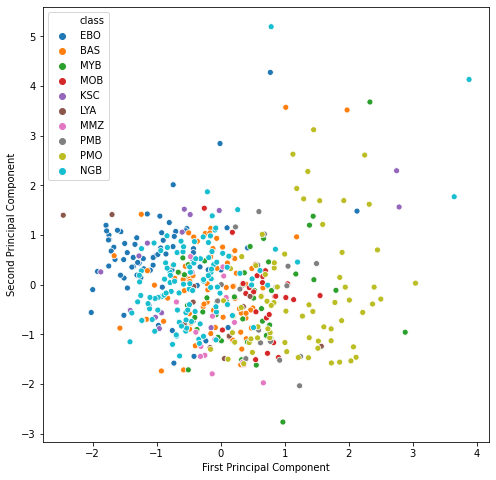

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 1',y='Principal Componenet 2',hue='class',data=pca_df)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')